In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from backtest_functions import *

# Import Data

In [2]:
full = pd.read_parquet('BTCUSD_indicators.parquet.gzip', engine='pyarrow')
full

,Close,High,Low,Open,Volume,OBV,SMA_10,SMA_20,SMA_50,EMA_10,...,MACD,MACD_signal_line,MACD_histogram,RSI_7,RSI_14,RSI_21,ADX,ATR_7,ATR_14,ATR_21
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,314.248993,320.434998,314.002991,320.434998,8036550,-8036550,NaN,NaN,NaN,314.248993,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,6.432007,6.432007,6.432007
2015-01-02,315.032013,315.838989,313.565002,314.079010,7860650,-175900,NaN,NaN,NaN,314.391360,...,0.062463,0.012493,0.049971,100.000000,100.000000,100.000000,NaN,5.838004,6.135005,6.234006
2015-01-03,281.082001,315.149994,281.082001,314.846008,33054400,-33230300,NaN,NaN,NaN,308.335113,...,-2.597573,-0.509521,-2.088053,1.938583,2.096744,2.149351,NaN,9.870860,8.130219,7.559434
2015-01-04,264.195007,287.230011,257.612000,281.145996,55629100,-88859400,NaN,NaN,NaN,300.309639,...,-5.999156,-1.607448,-4.391709,1.235506,1.375421,1.422420,NaN,12.691881,9.665061,8.609842
2015-01-05,274.473999,278.341003,265.084015,265.084015,43962800,-44896600,NaN,NaN,NaN,295.612250,...,-7.775871,-2.841132,-4.934739,21.462825,19.523695,18.943511,NaN,12.899612,9.985128,8.873469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-28,95163.929688,95525.898438,94014.289062,94160.187500,24107436185,1597080651503,96536.238281,99001.467188,95799.333125,96917.271622,...,41.713616,1067.757850,-1026.044233,40.191443,46.058619,50.352721,28.305182,3820.758473,3977.404632,3905.498478
2024-12-29,93530.226562,95174.875000,92881.789062,95174.054688,29635885267,1567444766236,96140.165625,98806.342578,96134.360312,96301.445247,...,-254.267439,803.352792,-1057.620231,34.974455,43.122878,48.192823,28.915199,3602.519539,3857.096154,3828.716929
2024-12-30,92643.210938,94903.320312,91317.132812,93527.195312,56188003691,1511256762545,95628.893750,98604.731641,96377.740781,95636.311736,...,-554.022875,531.877659,-1085.900534,32.317248,41.573470,47.042426,29.699958,3600.186391,3837.745536,3817.167908


In [8]:
full['EMA_5'] = full['Close'].ewm(span=5, adjust=False).mean()

In [9]:
D = full.loc['2021-01-01':'2024-12-31']
D

,Close,High,Low,Open,Volume,OBV,SMA_10,SMA_20,SMA_50,EMA_10,...,MACD_signal_line,MACD_histogram,RSI_7,RSI_14,RSI_21,ADX,ATR_7,ATR_14,ATR_21,EMA_5
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,29374.152344,29600.626953,28803.585938,28994.009766,40730301359,2332736026287,26601.549023,24250.427637,20615.851328,26931.031866,...,2083.567586,440.305535,89.913654,83.473437,80.192779,70.727005,1310.829231,1229.377650,1137.120890,28313.597170
2021-01-02,32127.267578,33155.117188,29091.181641,29376.455078,67865420765,2400601447052,27490.141211,24899.671875,20932.040508,27875.801995,...,2224.866392,565.195224,94.054939,87.570593,83.887215,71.661661,1704.130133,1431.846071,1276.493017,29584.820640
2021-01-03,32782.023438,34608.558594,32052.316406,32129.408203,78665235202,2479266682254,28394.748633,25576.440820,21266.318203,28767.842258,...,2383.703017,635.346501,94.662941,88.312680,84.604297,72.778253,1825.860427,1512.160080,1337.433453,30650.554906
2021-01-04,31971.914062,33440.218750,28722.755859,32810.949219,81163475344,2398103206910,29125.460938,26204.182715,21586.644727,29350.400768,...,2526.847766,572.578996,82.485955,81.804905,79.980129,73.290850,2238.946493,1741.110280,1498.387236,31091.007958
2021-01-05,33992.429688,34437.589844,30221.187500,31977.041016,67547324782,2465650531692,29881.000195,26838.274316,21932.171094,30194.406026,...,2679.130216,609.129801,87.256067,84.811226,82.486887,73.142549,2521.440186,1917.916856,1627.816527,32058.148534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,94164.859375,97294.843750,93310.742188,95704.976562,52419934565,1572973215318,97023.999219,99305.071484,95426.964063,97306.903163,...,1324.268908,-1071.723261,35.118425,43.889453,49.022062,28.223859,4205.616655,4167.081190,4025.192933,96236.503190
2024-12-28,95163.929688,95525.898438,94014.289062,94160.187500,24107436185,1597080651503,96536.238281,99001.467188,95799.333125,96917.271622,...,1067.757850,-1026.044233,40.191443,46.058619,50.352721,28.305182,3820.758473,3977.404632,3905.498478,95878.978689
2024-12-29,93530.226562,95174.875000,92881.789062,95174.054688,29635885267,1567444766236,96140.165625,98806.342578,96134.360312,96301.445247,...,803.352792,-1057.620231,34.974455,43.122878,48.192823,28.915199,3602.519539,3857.096154,3828.716929,95096.061314


In [10]:
D.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'OBV', 'SMA_10', 'SMA_20',
       'SMA_50', 'EMA_10', 'EMA_20', 'EMA_50', 'MACD', 'MACD_signal_line',
       'MACD_histogram', 'RSI_7', 'RSI_14', 'RSI_21', 'ADX', 'ATR_7', 'ATR_14',
       'ATR_21', 'EMA_5'],
      dtype='object')

# Buy & Hold Return (2021-2024)

In [73]:
df = pd.DataFrame(np.ones((1461,1)), index = D.index, columns = ['signal'])
df

,signal
Date,
2021-01-01,1.0
2021-01-02,1.0
2021-01-03,1.0
2021-01-04,1.0
2021-01-05,1.0
...,...
2024-12-27,1.0
2024-12-28,1.0
2024-12-29,1.0


Overall Annual Return: 33.87%
Overall Annual Sharpe Ratio: 0.5474
Maximum Drawdown: -76.63 %
Win/Loss Ratio: 1.0
Alpha: 0.0
Beta: 1.0

Yearly Metrics:
   year  yearly_return  yearly_std  yearly_beta  yearly_alpha  yearly_sharpe
0  2021       0.623428    0.804536          1.0           0.0       0.774891
1  2022      -0.651369    0.634633          1.0           0.0      -1.026372
2  2023       1.656669    0.439680          1.0           0.0       3.767896
3  2024       1.133341    0.533875          1.0           0.0       2.122857


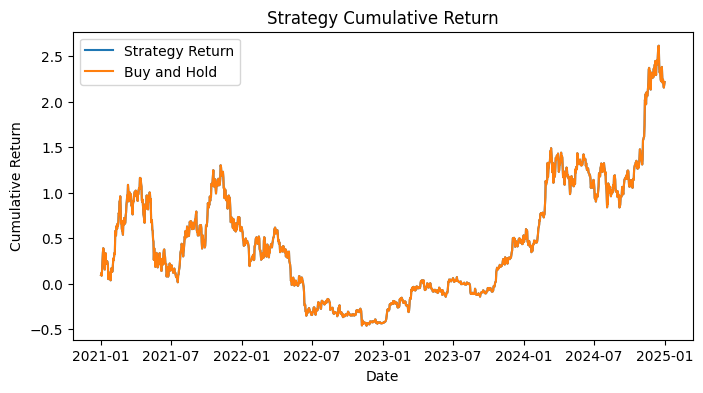

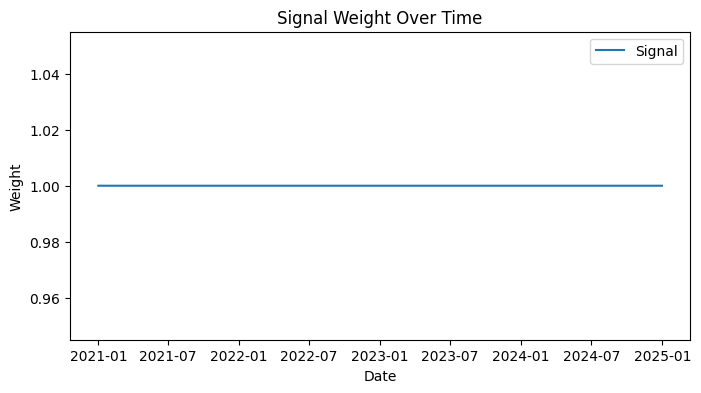

In [75]:
run_backtest(df)

## 33.87% annualized return

# Golden/Death Cross

## Golden Cross Only

In [11]:
SMA_200 = full['Close'].rolling(window=200).mean()

# temp =pd.concat([D['SMA_50'],SMA_200], axis=1, keys=['SMA_50', 'SMA_200'])
# temp = temp.loc['2021-01-01':'2024-12-31']

temp =pd.concat([D['SMA_50'],SMA_200, D['Close'], D['EMA_5']], axis=1, keys=['SMA_50', 'SMA_200', 'Close', 'EMA_5'])
temp = temp.loc['2021-01-01':'2024-12-31']

temp

,SMA_50,SMA_200,Close,EMA_5
Date,,,,
2021-01-01,20615.851328,13484.657568,29374.152344,28313.597170
2021-01-02,20932.040508,13597.603784,32127.267578,29584.820640
2021-01-03,21266.318203,13714.112627,32782.023438,30650.554906
2021-01-04,21586.644727,13826.912993,31971.914062,31091.007958
2021-01-05,21932.171094,13950.435049,33992.429688,32058.148534
...,...,...,...,...
2024-12-27,95426.964063,70991.144727,94164.859375,96236.503190
2024-12-28,95799.333125,71130.304219,95163.929688,95878.978689
2024-12-29,96134.360312,71256.749414,93530.226562,95096.061314


In [13]:
df = pd.DataFrame(np.where((temp['SMA_50']>temp['SMA_200']) & (temp['Close'] > temp['EMA_5']), 1, 0))
df.columns = ['signal']
df.index = temp.index

df

,signal
Date,
2021-01-01,1
2021-01-02,1
2021-01-03,1
2021-01-04,1
2021-01-05,1
...,...
2024-12-27,0
2024-12-28,0
2024-12-29,0


Overall Annual Return: 35.63%
Overall Annual Sharpe Ratio: 1.0764
Maximum Drawdown: -31.17 %
Win/Loss Ratio: 0.89
Alpha: 0.2465
Beta: 0.2859

Yearly Metrics:
   year  yearly_return  yearly_std  yearly_beta  yearly_alpha  yearly_sharpe
0  2021       0.989892    0.466297     0.335876      0.523155       2.122877
1  2022      -0.010515    0.042616     0.004454     -0.005882      -0.246747
2  2023       0.000371    0.296640     0.454545     -0.444438       0.001252
3  2024       0.717108    0.361413     0.456563      0.194570       1.984177


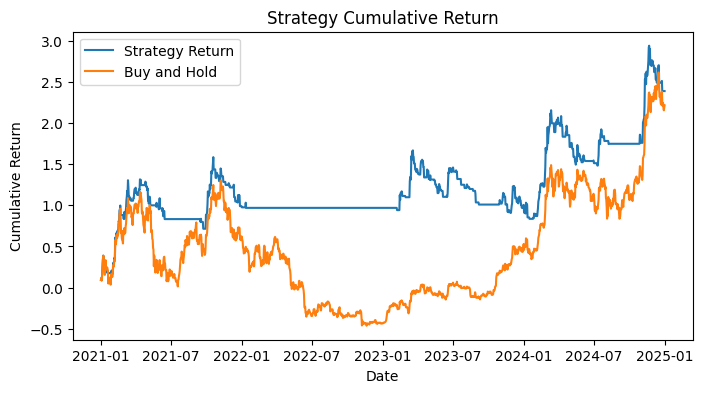

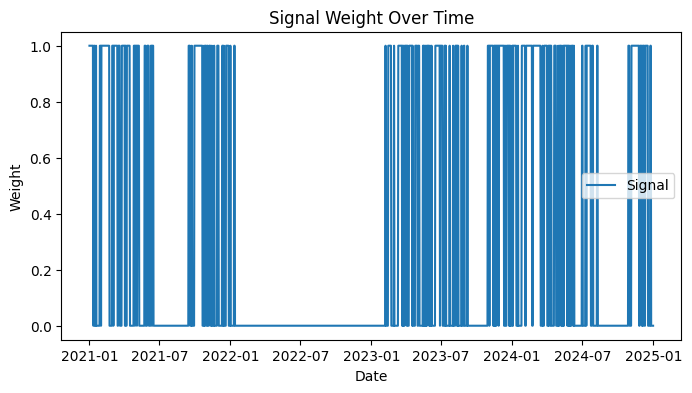

In [14]:
run_backtest(df)

## Death Cross Only

In [33]:
df = pd.DataFrame(np.where(temp['SMA_50'] < temp['SMA_200'], -1, 0))
df.columns = ['signal']
df.index = temp.index
df.head()

,signal
Date,
2021-01-01,0
2021-01-02,0
2021-01-03,0
2021-01-04,0
2021-01-05,0


Overall Annual Return: -16.21%
Overall Annual Sharpe Ratio: -0.4208
Maximum Drawdown: -59.99 %
Win/Loss Ratio: 0.97
Alpha: 0.0879
Beta: -0.3874

Yearly Metrics:
   year  yearly_return  yearly_std  yearly_beta  yearly_alpha  yearly_sharpe
0  2021      -0.341688    0.340098    -0.178014     -0.216718      -1.004678
1  2022       0.740784    0.629411    -0.983111     -0.083232       1.176947
2  2023      -0.487408    0.204409    -0.212211     -0.418273      -2.384478
3  2024      -0.160980    0.196759    -0.134711     -0.034946      -0.818157


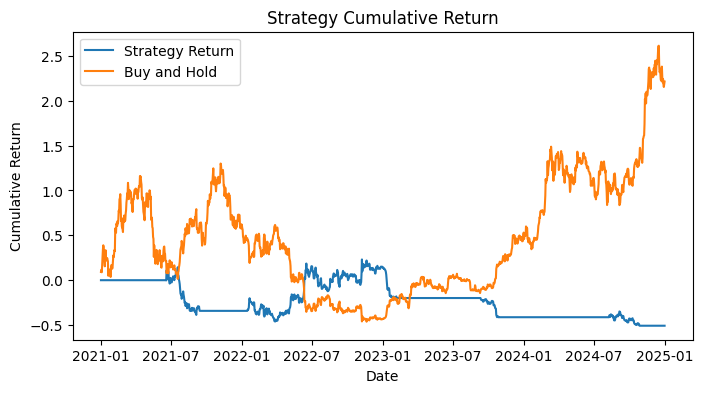

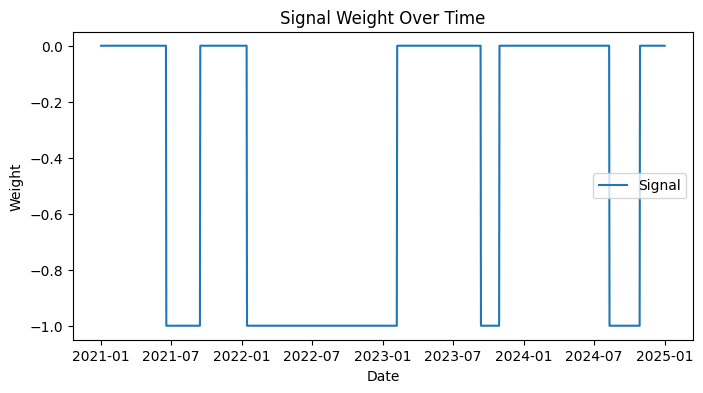

In [34]:
run_backtest(df)

## Golden & Death

In [70]:
df = pd.DataFrame(np.where(temp['SMA_50'] > temp['SMA_200'], 1, -1))
df.columns = ['signal']
df.index = temp.index
df.head()

# long = pd.DataFrame(np.where(temp['SMA_50'] > temp['SMA_200'], 1, 0))
# short = pd.DataFrame(np.where(temp['SMA_50'] < temp['SMA_200'], -1, 0))
# condition = long + short
# condition.columns = ['signal']
# condition.index = temp.index
# df = condition
# df


,signal
Date,
2021-01-01,1
2021-01-02,1
2021-01-03,1
2021-01-04,1
2021-01-05,1
...,...
2024-12-27,1
2024-12-28,1
2024-12-29,1


Overall Annual Return: 9.07%
Overall Annual Sharpe Ratio: 0.1465
Maximum Drawdown: -72.94 %
Win/Loss Ratio: 0.97
Alpha: 0.1836
Beta: 0.2251

Yearly Metrics:
   year  yearly_return  yearly_std  yearly_beta  yearly_alpha  yearly_sharpe
0  2021      -0.209914    0.805634     0.643973     -0.433435      -0.260558
1  2022       0.573333    0.635267    -0.966222     -0.166464       0.902507
2  2023      -0.271357    0.443117     0.575577     -0.836546      -0.612382
3  2024       0.561039    0.535067     0.730579     -0.069892       1.048539


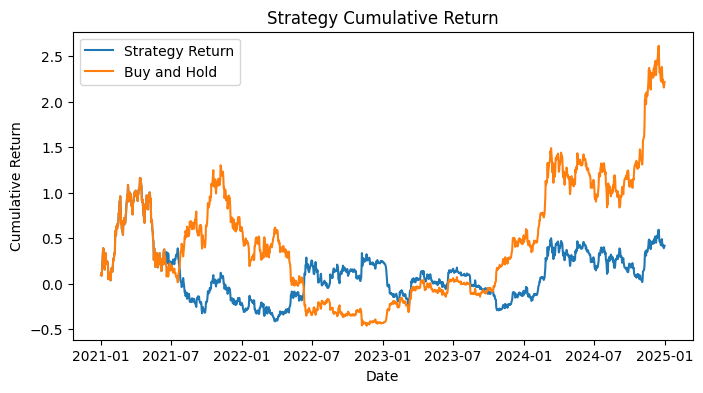

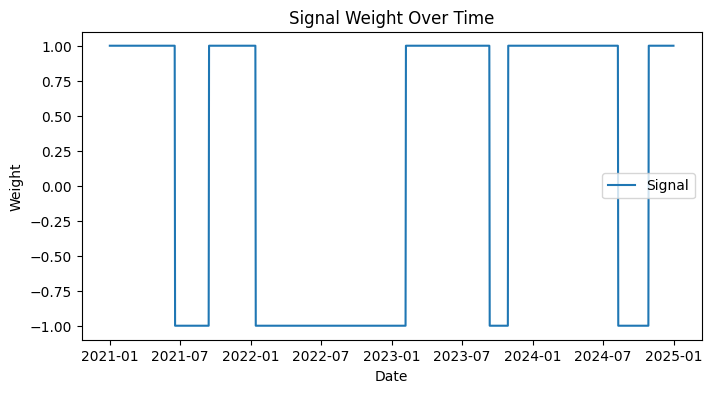

In [36]:
run_backtest(df)

# Fibonacci 5, 8, 13

## Long only

In [15]:
# Add 5, 8, 13 EMA 

ema_5 = full['Close'].ewm(span=5, adjust=False).mean()
ema_8 = full['Close'].ewm(span=8, adjust=False).mean()
ema_13 = full['Close'].ewm(span=13, adjust=False).mean()

ema = pd.concat([D['Close'],ema_5, ema_8, ema_13], axis=1, keys=['Close','EMA_5', 'EMA_8', 'EMA_13'])
ema = ema.loc['2021-01-01':'2024-12-31']

ema

,Close,EMA_5,EMA_8,EMA_13
Date,,,,
2021-01-01,29374.152344,28313.597170,27455.355985,26219.169370
2021-01-02,32127.267578,29584.820640,28493.558561,27063.183400
2021-01-03,32782.023438,30650.554906,29446.550756,27880.160548
2021-01-04,31971.914062,31091.007958,30007.742602,28464.696764
2021-01-05,33992.429688,32058.148534,30893.228621,29254.372896
...,...,...,...,...
2024-12-27,94164.859375,96236.503190,96946.161288,97670.536543
2024-12-28,95163.929688,95878.978689,96550.109821,97312.449849
2024-12-29,93530.226562,95096.061314,95879.024652,96772.132237


In [18]:
condition = ema[(ema['EMA_5'] > ema['EMA_8']) & 
                (ema['EMA_8'] > ema['EMA_13'])
                & (ema['Close'] > ema['EMA_5'])] # & (ema['Close'] > ema['EMA_5'])

df = pd.DataFrame(np.where(D.index.isin(condition.index), 1, 0), index = D.index, columns=['signal'])



Overall Annual Return: 40.13%
Overall Annual Sharpe Ratio: 1.1593
Maximum Drawdown: -43.36 %
Win/Loss Ratio: 0.95
Alpha: 0.2781
Beta: 0.3127

Yearly Metrics:
   year  yearly_return  yearly_std  yearly_beta  yearly_alpha  yearly_sharpe
0  2021       1.153959    0.463343     0.331920      0.604809       2.490506
1  2022      -0.286640    0.245142     0.148072     -0.181528      -1.169281
2  2023       0.473268    0.300982     0.464668     -0.066775       1.572411
3  2024       0.702435    0.335905     0.394107      0.233491       2.091172


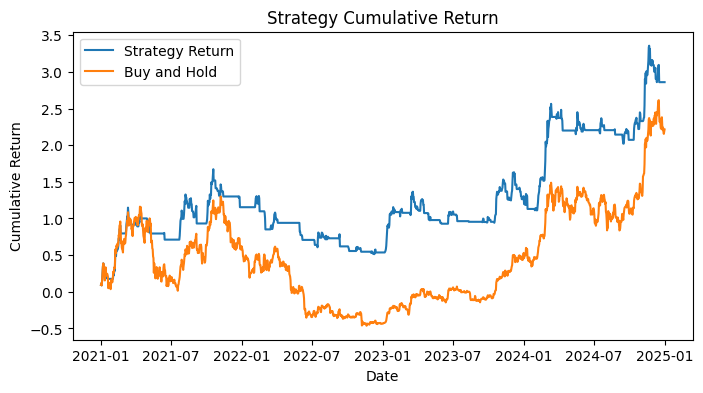

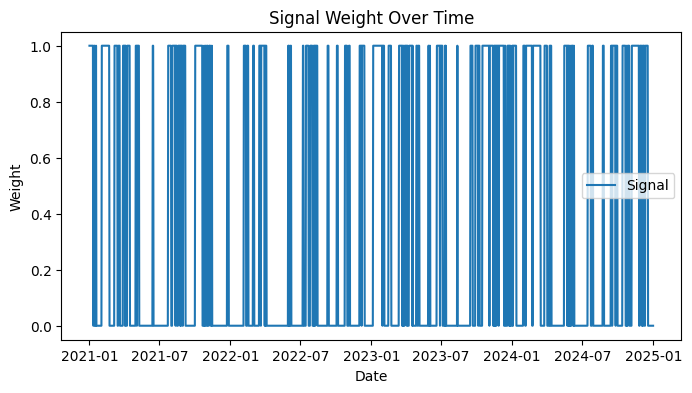

In [19]:
run_backtest(df)

## Short only

In [ ]:
condition = ema[(ema['EMA_5'] < ema['EMA_8']) & 
                (ema['EMA_8'] < ema['EMA_13']) & 
                (ema['Close'] < ema['EMA_5'])]

df = pd.DataFrame(np.where(D.index.isin(condition.index), -1, 0), index = D.index, columns=['signal'])

Overall Annual Return: -24.94%
Overall Annual Sharpe Ratio: -0.6399
Maximum Drawdown: -68.79 %
Win/Loss Ratio: 0.82
Alpha: -0.0188
Beta: -0.3963

Yearly Metrics:
   year  yearly_return  yearly_std  yearly_beta  yearly_alpha  yearly_sharpe
0  2021      -0.351144    0.496153    -0.379660     -0.001775      -0.707733
1  2022      -0.127680    0.491599    -0.600130     -0.525806      -0.259724
2  2023      -0.207540    0.201491    -0.207411      0.010410      -1.030022
3  2024      -0.292173    0.283588    -0.280416     -0.052398      -1.030272


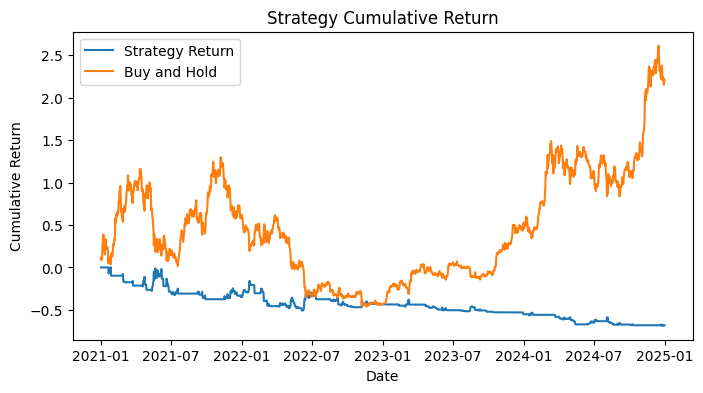

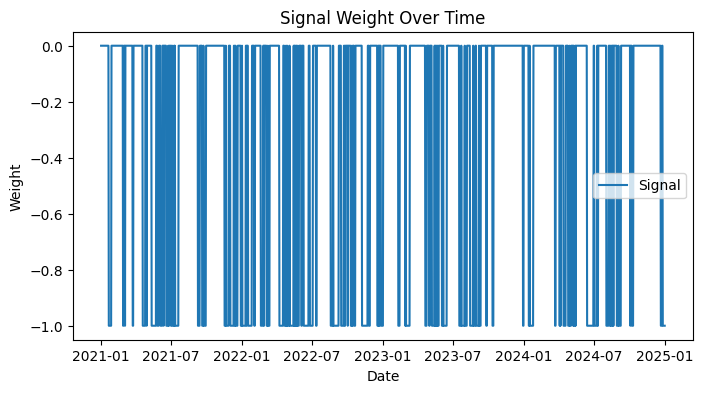

In [28]:
run_backtest(df)

## Long & Short 

In [40]:
long_condition = np.where((ema['EMA_5'] > ema['EMA_8']) & 
                (ema['EMA_8'] > ema['EMA_13']) & 
                (ema['Close'] > ema['EMA_5']), 1, 0)
short_condition = np.where((ema['EMA_5'] < ema['EMA_8']) & 
                (ema['EMA_8'] < ema['EMA_13']) & 
                (ema['Close'] < ema['EMA_5']), -1, 0)
condition = long_condition + short_condition

df = pd.DataFrame(condition, index = ema.index, columns=['signal'])


Overall Annual Return: 5.18%
Overall Annual Sharpe Ratio: 0.0994
Maximum Drawdown: -54.69 %
Win/Loss Ratio: 0.88
Alpha: 0.254
Beta: -0.0836

Yearly Metrics:
   year  yearly_return  yearly_std  yearly_beta  yearly_alpha  yearly_sharpe
0  2021       0.397609    0.679950    -0.047741      0.603035       0.584762
1  2022      -0.377721    0.549305    -0.452058     -0.707334      -0.687635
2  2023       0.167506    0.362895     0.257258     -0.056366       0.461584
3  2024       0.205029    0.440725     0.113691      0.181093       0.465210


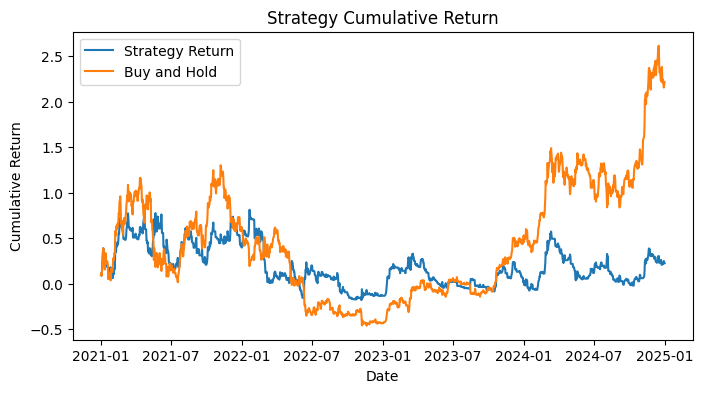

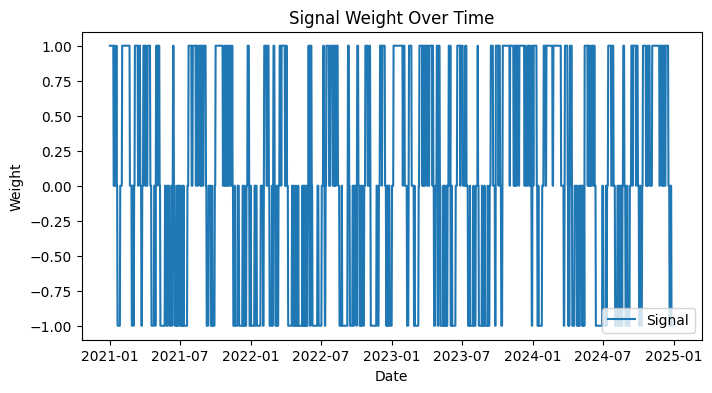

In [41]:
run_backtest(df)

# MACD + ADX

## Long ADX uptrend

In [20]:
df = full.copy()
df['EMA_5'] = df['Close'].ewm(span=5, adjust=False).mean()
df = df.loc['2021-01-01':'2024-12-31']


macd = df[df['MACD_histogram'] > 0]
adx = df[df['ADX'] > 25]
ema = df[(df['Close'] > df['EMA_5'])]

condition = D.index.isin(macd.index) & D.index.isin(adx.index)  & D.index.isin(ema.index) 

df = pd.DataFrame(np.where(condition, 1, 0), index = D.index, columns=['signal'])   

Overall Annual Return: 39.36%
Overall Annual Sharpe Ratio: 1.23
Maximum Drawdown: -40.72 %
Win/Loss Ratio: 0.98
Alpha: 0.2879
Beta: 0.2671

Yearly Metrics:
   year  yearly_return  yearly_std  yearly_beta  yearly_alpha  yearly_sharpe
0  2021       1.115317    0.424816     0.278919      0.612126       2.625410
1  2022      -0.335475    0.259777     0.166343     -0.232982      -1.291395
2  2023       0.577027    0.262946     0.353588      0.109858       2.194470
3  2024       0.700316    0.301659     0.317471      0.290103       2.321549


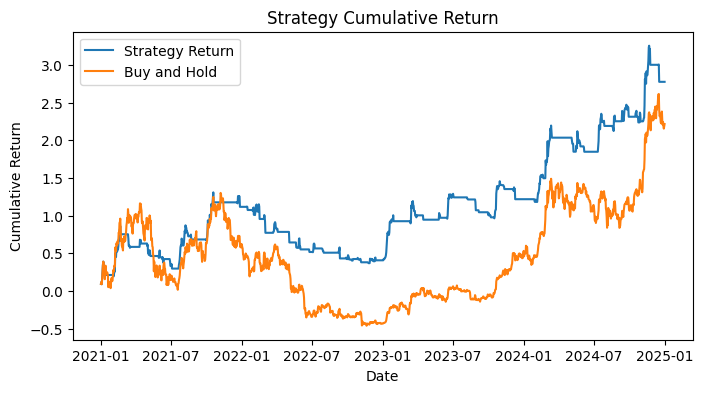

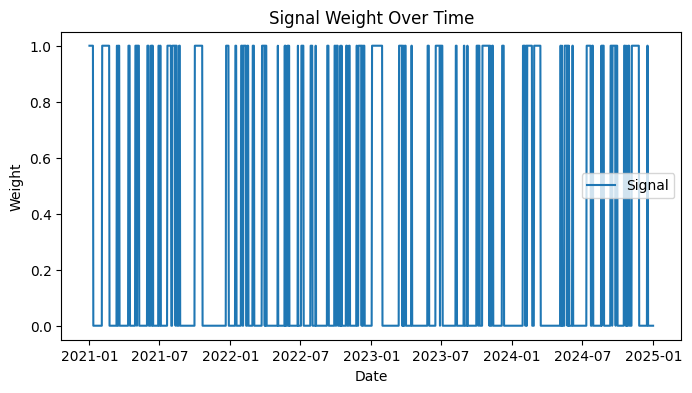

In [21]:
run_backtest(df)

## Short ADX downtrend

In [9]:
macd = D[D['MACD_histogram'] < 0]
adx = D[D['ADX'] > 25]

condition = D.index.isin(macd.index) & D.index.isin(adx.index)

df = pd.DataFrame(np.where(condition, -1, 0), index = D.index, columns=['signal'])

Overall Annual Return: -17.44%
Overall Annual Sharpe Ratio: -0.4266
Maximum Drawdown: -66.58 %
Win/Loss Ratio: 0.96
Alpha: 0.1085
Beta: -0.436

Yearly Metrics:
   year  yearly_return  yearly_std  yearly_beta  yearly_alpha  yearly_sharpe
0  2021      -0.034625    0.520406    -0.418790      0.438411      -0.066534
1  2022       0.249281    0.443806    -0.487881     -0.093279       0.561688
2  2023      -0.369176    0.280877    -0.404192      0.013502      -1.314368
3  2024      -0.388737    0.349065    -0.425552     -0.047498      -1.113652


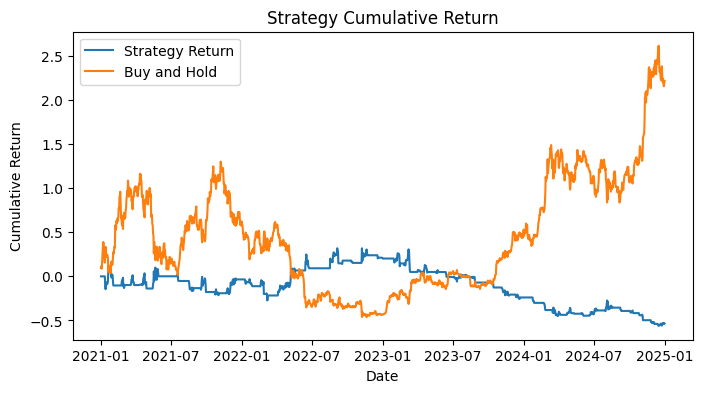

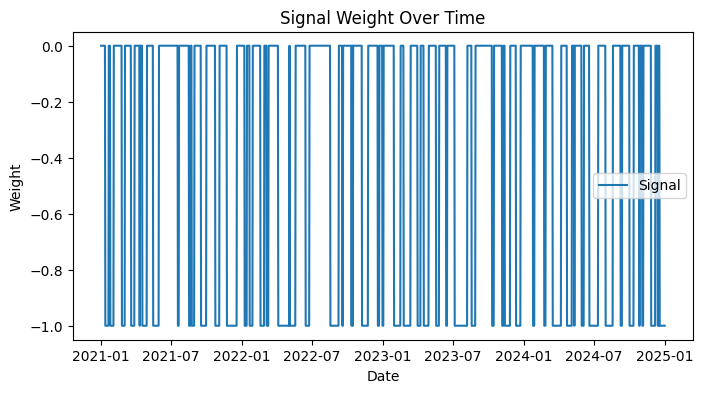

In [10]:
run_backtest(df)

## Long/short ADX with up/downtrend

In [13]:
bull = D[D['MACD_histogram'] > 0]
adx = D[D['ADX'] > 25]
long_condition = np.where(D.index.isin(bull.index) & D.index.isin(adx.index), 1, 0)

bear = D[D['MACD_histogram'] < 0]
short_condition = np.where(D.index.isin(bear.index) & D.index.isin(adx.index), -1, 0)

condition = long_condition + short_condition

df = pd.DataFrame(condition, index = D.index, columns=['signal'])
df


# macd = D[D['MACD_histogram'] > 0]
# adx = D[D['ADX'] > 25]
# condition = D.index.isin(macd.index) & D.index.isin(adx.index)

# df = pd.DataFrame(np.where(condition, 1, -1), index = D.index, columns=['signal'])
# df

,signal
Date,
2021-01-01,1
2021-01-02,1
2021-01-03,1
2021-01-04,1
2021-01-05,1
...,...
2024-12-27,-1
2024-12-28,-1
2024-12-29,-1


Overall Annual Return: 16.45%
Overall Annual Sharpe Ratio: 0.2972
Maximum Drawdown: -45.67 %
Win/Loss Ratio: 0.97
Alpha: 0.4052
Beta: -0.0736

Yearly Metrics:
   year  yearly_return  yearly_std  yearly_beta  yearly_alpha  yearly_sharpe
0  2021       1.215126    0.721044    -0.032573      1.079573       1.685231
1  2022      -0.269213    0.565120    -0.187273     -0.312484      -0.476381
2  2023       0.111533    0.392837    -0.025245      0.209639       0.283915
3  2024       0.022207    0.481146    -0.047349      0.180075       0.046154


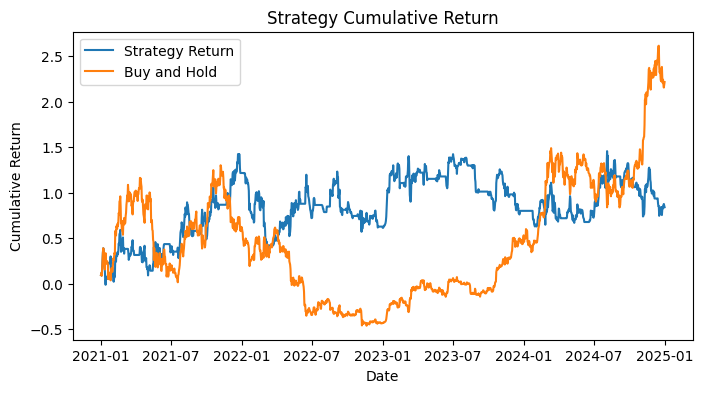

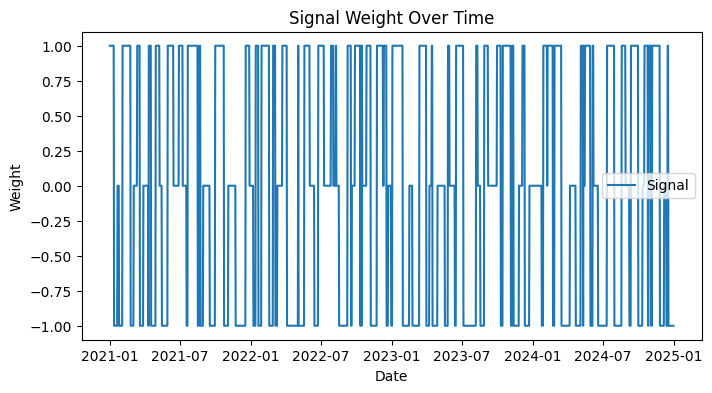

In [14]:
run_backtest(df)

In [56]:
df = pd.DataFrame(np.where(D['SMA_10']>D['SMA_50'], 1, -1))
df.columns = ['signal']
df.index = D.index

df.head()

,signal
Date,
2021-01-01,1
2021-01-02,1
2021-01-03,1
2021-01-04,1
2021-01-05,1


Overall Annual Return: 15.72%
Overall Annual Sharpe Ratio: 0.2539
Maximum Drawdown: -60.27 %
Win/Loss Ratio: 1.0
Alpha: 0.3944
Beta: 0.0101

Yearly Metrics:
   year  yearly_return  yearly_std  yearly_beta  yearly_alpha  yearly_sharpe
0  2021       0.645705    0.804500     0.067468      0.765451       0.802617
1  2022      -0.095087    0.636168    -0.422625     -0.255592      -0.149469
2  2023       0.384648    0.442710     0.254358      0.150151       0.868850
3  2024      -0.129745    0.535951     0.321364     -0.284334      -0.242084


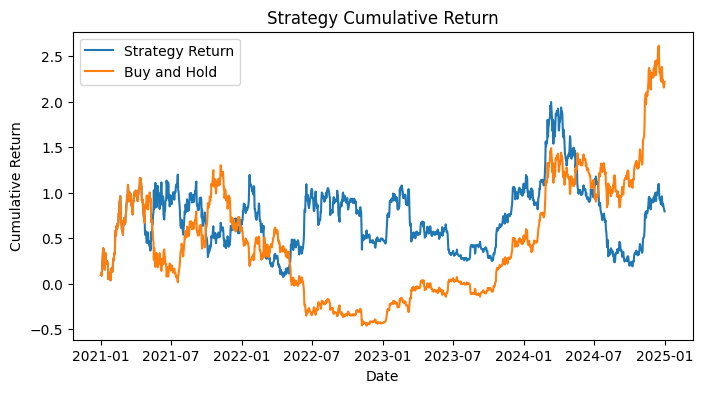

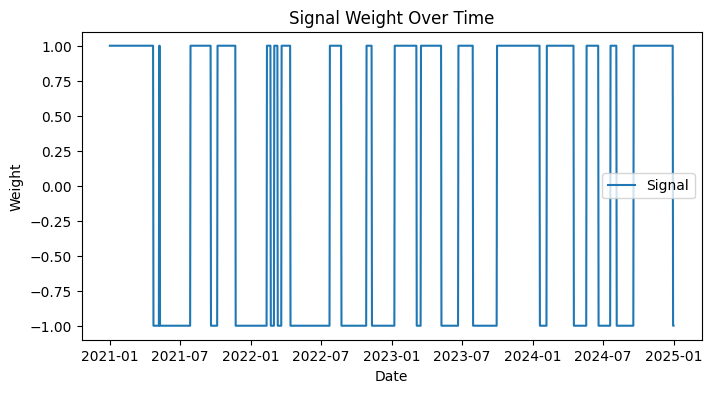

In [57]:
run_backtest(df)

In [64]:
df = pd.DataFrame(np.where(D['EMA_10']>D['EMA_50'], 1, -1))
df.columns = ['signal']
df.index = D.index

df.head()

,signal
Date,
2021-01-01,1
2021-01-02,1
2021-01-03,1
2021-01-04,1
2021-01-05,1


Overall Annual Return: 15.65%
Overall Annual Sharpe Ratio: 0.2529
Maximum Drawdown: -65.41 %
Win/Loss Ratio: 1.01
Alpha: 0.38
Beta: 0.031

Yearly Metrics:
   year  yearly_return  yearly_std  yearly_beta  yearly_alpha  yearly_sharpe
0  2021       0.678946    0.804440     0.214656      0.667660       0.843999
1  2022      -0.177001    0.636191    -0.711318     -0.594708      -0.278220
2  2023       0.262762    0.442926     0.414685     -0.114485       0.593242
3  2024       0.025689    0.535878     0.397143     -0.188519       0.047938


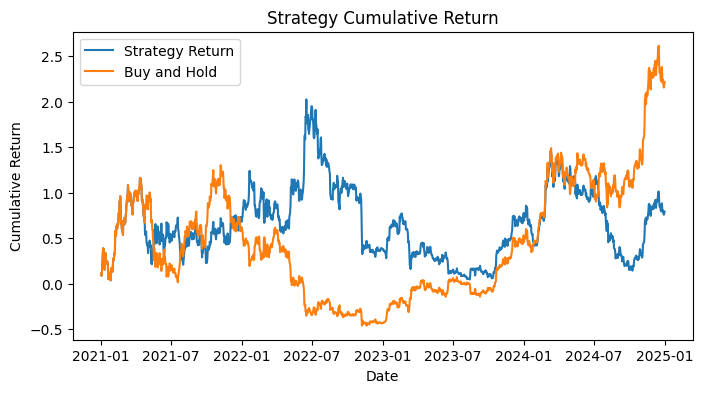

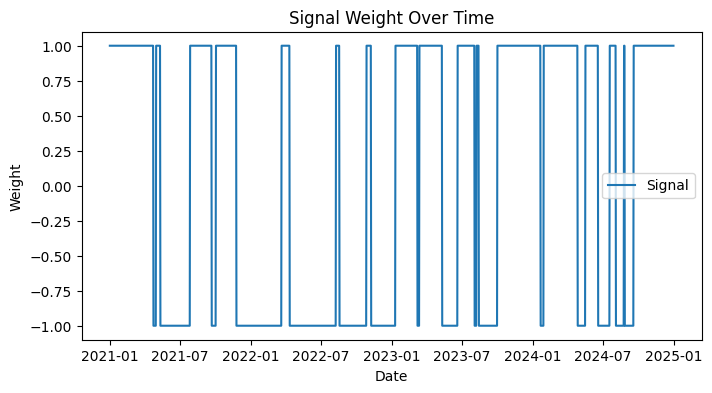

In [65]:
run_backtest(df)

Overall Annual Return: -31.23%
Overall Annual Sharpe Ratio: -0.5043
Maximum Drawdown: -92.74 %
Win/Loss Ratio: 0.91
Alpha: -0.1797
Beta: 0.0338

Yearly Metrics:
   year  yearly_return  yearly_std  yearly_beta  yearly_alpha  yearly_sharpe
0  2021      -0.572763    0.805176     0.073017     -0.584197      -0.711351
1  2022      -0.517208    0.635597    -0.283761     -0.765111      -0.813735
2  2023      -0.239104    0.443171     0.218442     -0.409211      -0.539530
3  2024       0.422632    0.535322     0.262170      0.259699       0.789491


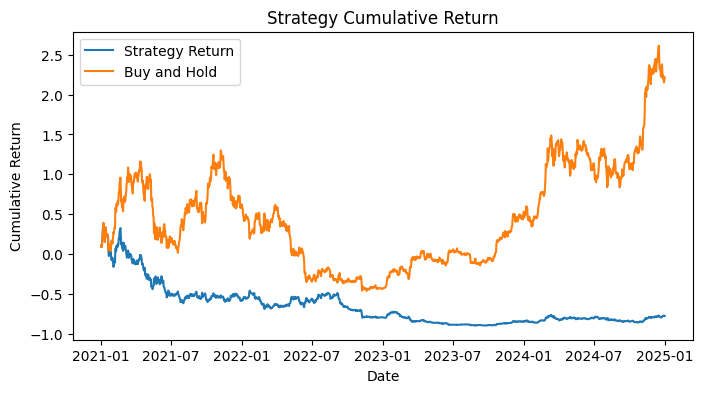

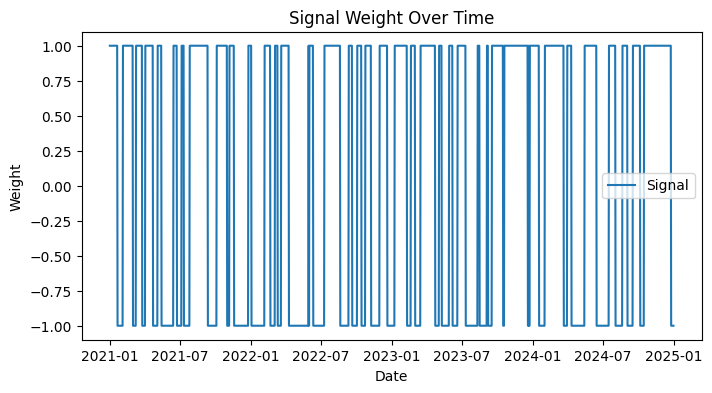

In [70]:
df = pd.DataFrame(np.where(D['SMA_10']>D['SMA_20'], 1, -1))
df.columns = ['signal']
df.index = temp.index

run_backtest(df)

Overall Annual Return: 15.65%
Overall Annual Sharpe Ratio: 0.2529
Maximum Drawdown: -65.41 %
Win/Loss Ratio: 1.01
Alpha: 0.38
Beta: 0.031

Yearly Metrics:
   year  yearly_return  yearly_std  yearly_beta  yearly_alpha  yearly_sharpe
0  2021       0.678946    0.804440     0.214656      0.667660       0.843999
1  2022      -0.177001    0.636191    -0.711318     -0.594708      -0.278220
2  2023       0.262762    0.442926     0.414685     -0.114485       0.593242
3  2024       0.025689    0.535878     0.397143     -0.188519       0.047938


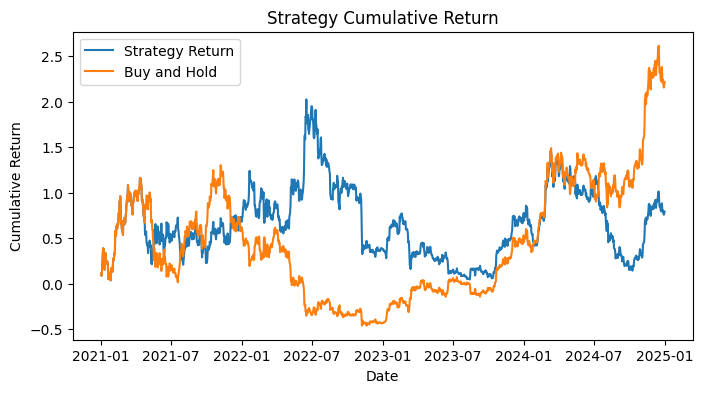

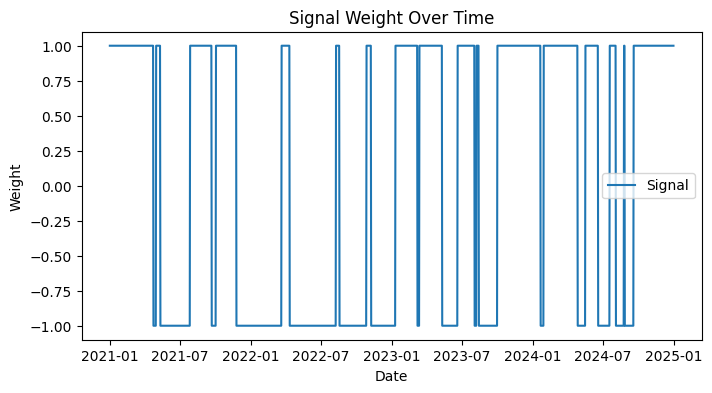

In [71]:
df = pd.DataFrame(np.where(D['EMA_10']>D['EMA_50'], 1, -1))
df.columns = ['signal']
df.index = temp.index

run_backtest(df)

# SMA + RSI

## Long 

In [22]:
# Bull market when RSI_14 > 50
# Long when SMA_5 > SMA_50 and close > EMA_5

df = full.copy()
df['EMA_5'] = df['Close'].ewm(span=5, adjust=False).mean()
df['SMA_5'] = df['Close'].rolling(window=5).mean()
df = df.loc['2021-01-01':'2024-12-31']

bull = df[df['RSI_14']>40]
long = df[(df['SMA_5'] > df['SMA_50'])& (df['Close'] > df['EMA_5'])] # & (df['Close'] > df['EMA_5'])

condition = df.index.isin(bull.index) & df.index.isin(long.index) 

df = pd.DataFrame(np.where(condition, 1, 0), index = df.index, columns=['signal'])

Overall Annual Return: 57.02%
Overall Annual Sharpe Ratio: 1.6776
Maximum Drawdown: -31.02 %
Win/Loss Ratio: 0.99
Alpha: 0.4363
Beta: 0.3018

Yearly Metrics:
   year  yearly_return  yearly_std  yearly_beta  yearly_alpha  yearly_sharpe
0  2021       1.600825    0.459295     0.327041      0.795629       3.485399
1  2022      -0.219386    0.168895     0.069846     -0.173804      -1.298948
2  2023       0.700361    0.316641     0.514566      0.027799       2.211847
3  2024       0.760411    0.347782     0.422709      0.245183       2.186460


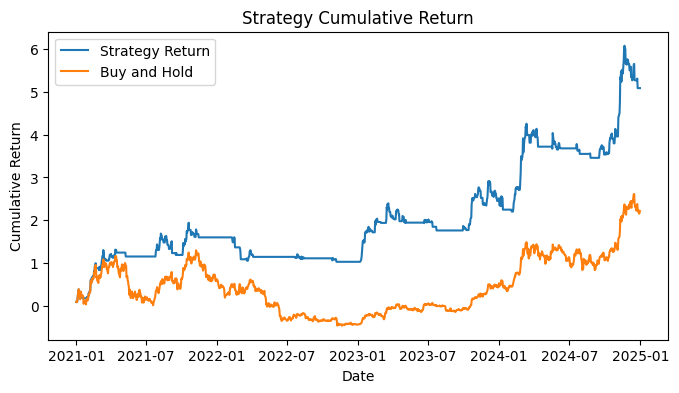

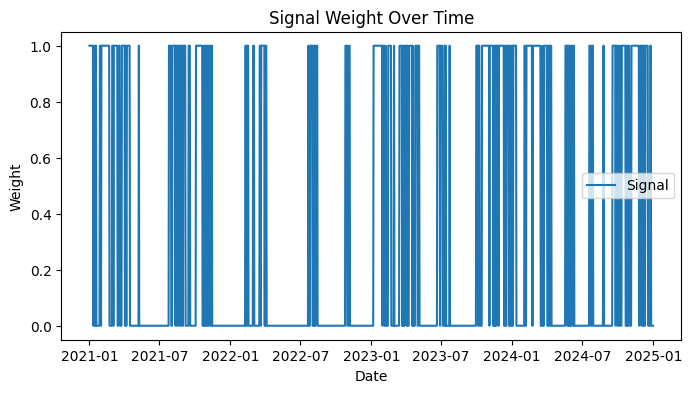

In [23]:
run_backtest(df)

## Short

In [12]:
# Bear market when RSI_14 < 50
# Short when EMA_5 < EMA_60 and close < EMA_5

df = full.copy()
df['EMA_5'] = df['Close'].ewm(span=5, adjust=False).mean()
df['EMA_60'] = df['Close'].ewm(span=60, adjust=False).mean()
df = df.loc['2021-01-01':'2024-12-31']

bear = df[df['RSI_14']<50]
short = df[(df['EMA_5'] < df['EMA_60']) # & (df['Close'] < df['EMA_5']
] #  
condition = df.index.isin(bear.index) & df.index.isin(short.index)

df = pd.DataFrame(np.where(condition, -1, 0), index = df.index, columns=['signal'])

Overall Annual Return: -13.93%
Overall Annual Sharpe Ratio: -0.337
Maximum Drawdown: -60.21 %
Win/Loss Ratio: 0.95
Alpha: 0.1634
Beta: -0.4464

Yearly Metrics:
   year  yearly_return  yearly_std  yearly_beta  yearly_alpha  yearly_sharpe
0  2021      -0.077093    0.494635    -0.378142      0.347619      -0.155859
1  2022       0.145532    0.565117    -0.791809     -0.377287       0.257525
2  2023      -0.277688    0.210555    -0.226014     -0.060052      -1.318838
3  2024      -0.281152    0.276751    -0.267014     -0.050860      -1.015903


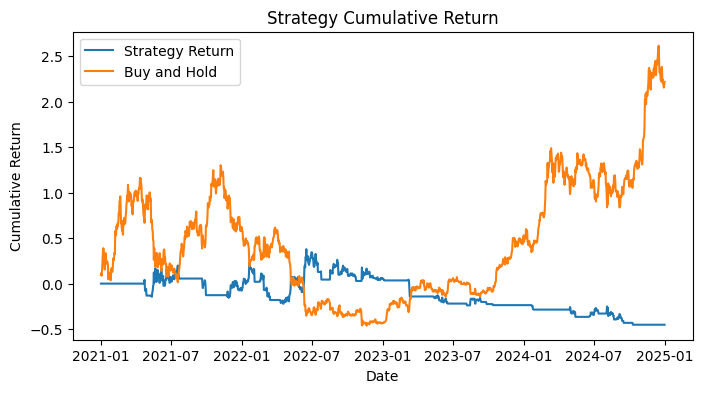

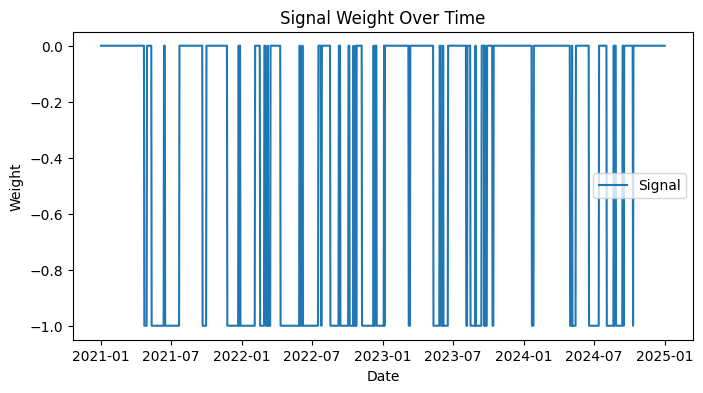

In [13]:
run_backtest(df)

## Long Short

In [120]:
# 2 conditions

df = full.copy()
df['EMA_5'] = df['Close'].ewm(span=5, adjust=False).mean()
df['EMA_60'] = df['Close'].ewm(span=60, adjust=False).mean()
df = df.loc['2021-01-01':'2024-12-31']

bull = df[df['RSI_14']>50]
long = df[(df['EMA_5'] > df['EMA_60']) & (df['Close'] > df['EMA_5'])]
long_condition = np.where(df.index.isin(bull.index) & df.index.isin(long.index), 1, 0)

bear = df[df['RSI_14']<50]
short = df[(df['EMA_5'] < df['EMA_60']) & (df['Close'] < df['EMA_5'])]
short_condition = np.where(df.index.isin(bear.index) & df.index.isin(short.index), -1, 0)

condition = long_condition + short_condition
df = pd.DataFrame(condition, index = df.index, columns=['signal'])

Overall Annual Return: 25.11%
Overall Annual Sharpe Ratio: 0.5007
Maximum Drawdown: -48.65 %
Win/Loss Ratio: 0.91
Alpha: 0.4587
Beta: -0.0596

Yearly Metrics:
   year  yearly_return  yearly_std  yearly_beta  yearly_alpha  yearly_sharpe
0  2021       0.880158    0.643127     0.030024      0.812212       1.368560
1  2022      -0.125616    0.524246    -0.613922     -0.518576      -0.239613
2  2023       0.173512    0.359329     0.374636     -0.178695       0.482877
3  2024       0.269978    0.435633     0.218262      0.137160       0.619738


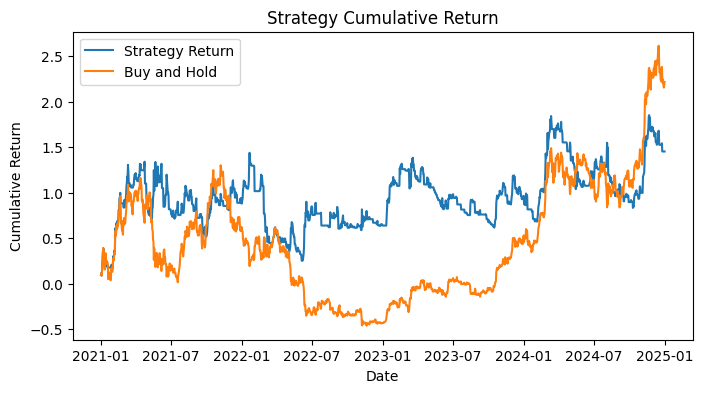

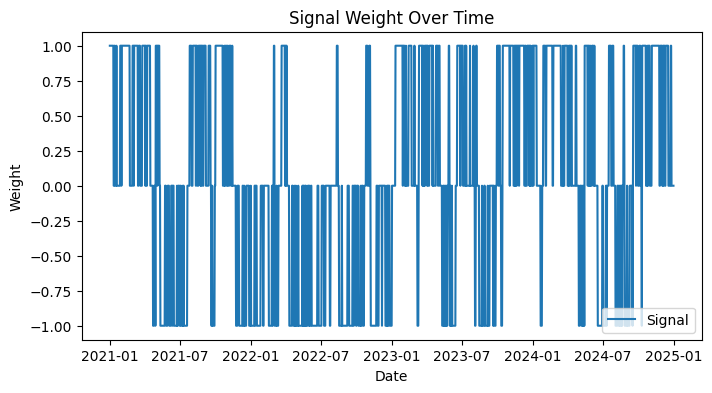

In [121]:
run_backtest(df)

Overall Annual Return: 38.39%
Overall Annual Sharpe Ratio: 0.6205
Maximum Drawdown: -56.22 %
Win/Loss Ratio: 0.99
Alpha: 1.0336
Beta: -0.4041

Yearly Metrics:
   year  yearly_return  yearly_std  yearly_beta  yearly_alpha  yearly_sharpe
0  2021       1.364051    0.803265    -0.331948      1.449014       1.698134
1  2022       0.593327    0.635231    -0.932617     -0.125162       0.934033
2  2023      -0.235158    0.443175     0.032882     -0.205955      -0.530621
3  2024       0.273562    0.535572    -0.123078      0.495487       0.510785


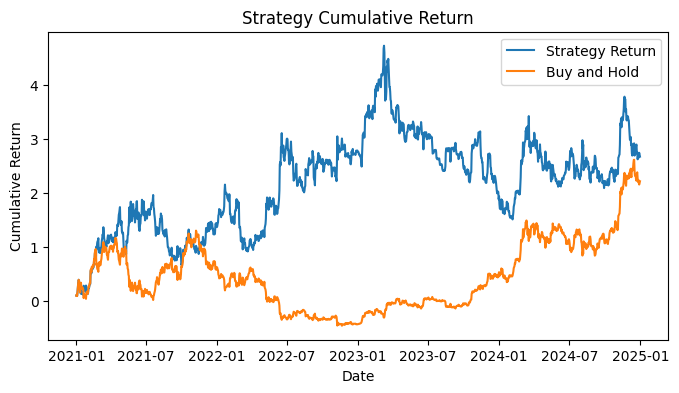

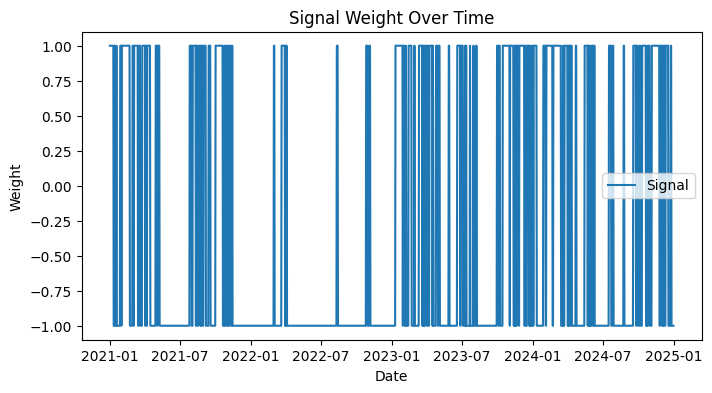

In [50]:
# Complete Opposite

df = full.copy()
df['EMA_5'] = df['Close'].ewm(span=5, adjust=False).mean()
df['EMA_60'] = df['Close'].ewm(span=60, adjust=False).mean()
df = df.loc['2021-01-01':'2024-12-31']

bull = df[df['RSI_14']>50]
long = df[(df['EMA_5'] > df['EMA_60']) & (df['Close'] > df['EMA_5'])]
condition = np.where(df.index.isin(bull.index) & df.index.isin(long.index), 1, -1)

df = pd.DataFrame(condition, index = df.index, columns=['signal'])

run_backtest(df)

# MACD + RSI

## Long

In [24]:
df = full.copy()
df['EMA_5'] = df['Close'].ewm(span=5, adjust=False).mean()
df = df.loc['2021-01-01':'2024-12-31']

rsi = df[(df['RSI_14'] > 40)]
macd = df[(df['MACD_histogram'] > 0)]
ema = df[(df['Close'] > df['EMA_5'])]

condition = np.where((D.index.isin(macd.index)) 
                     & (D.index.isin(rsi.index))  
                     & (D.index.isin(ema.index)), 1, 0) # & (D.index.isin(ema.index))

df = pd.DataFrame(condition, index = D.index, columns=['signal'])

Overall Annual Return: 37.37%
Overall Annual Sharpe Ratio: 1.0944
Maximum Drawdown: -38.27 %
Win/Loss Ratio: 0.94
Alpha: 0.256
Beta: 0.3042

Yearly Metrics:
   year  yearly_return  yearly_std  yearly_beta  yearly_alpha  yearly_sharpe
0  2021       0.795879    0.451702     0.314866      0.431298       1.761956
1  2022      -0.267487    0.288495     0.205583     -0.094690      -0.927181
2  2023       0.743957    0.281040     0.404522      0.160779       2.647155
3  2024       0.551719    0.315595     0.347513      0.175943       1.748189


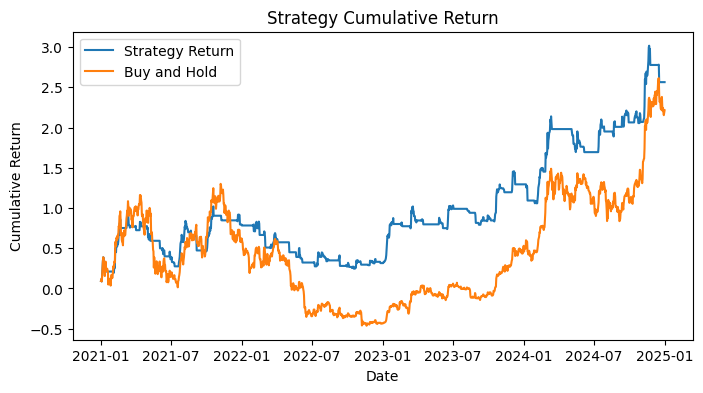

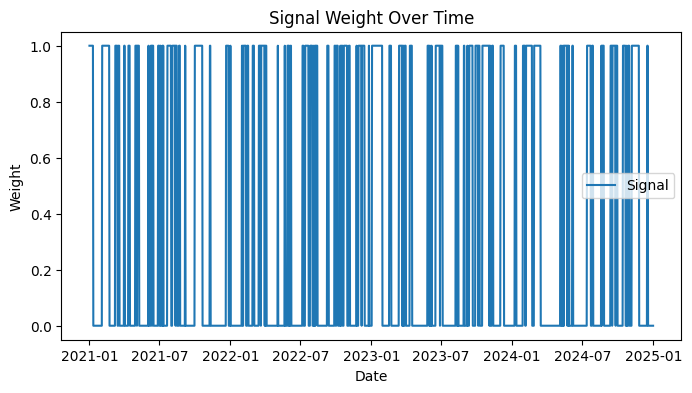

In [25]:
run_backtest(df)

## Short

In [93]:
df = full.copy()
df['EMA_5'] = df['Close'].ewm(span=5, adjust=False).mean()
df = df.loc['2021-01-01':'2024-12-31']
rsi = df[(df['RSI_14'] < 50)]
macd = df[(df['MACD_histogram'] < 0)]
ema = df[(df['Close'] < df['EMA_5'])]

condition = np.where((D.index.isin(macd.index)) & 
                     (D.index.isin(rsi.index)) & 
                     (D.index.isin(ema.index)), -1, 0)

df = pd.DataFrame(condition, index = D.index, columns=['signal'])

Overall Annual Return: -17.01%
Overall Annual Sharpe Ratio: -0.4704
Maximum Drawdown: -53.34 %
Win/Loss Ratio: 0.83
Alpha: 0.0449
Beta: -0.3411

Yearly Metrics:
   year  yearly_return  yearly_std  yearly_beta  yearly_alpha  yearly_sharpe
0  2021      -0.276856    0.446014    -0.306778      0.023791      -0.620733
1  2022      -0.003079    0.456216    -0.516258     -0.338402      -0.006750
2  2023      -0.154833    0.181450    -0.168323      0.029004      -0.853312
3  2024      -0.221308    0.289706    -0.293084      0.056187      -0.763906


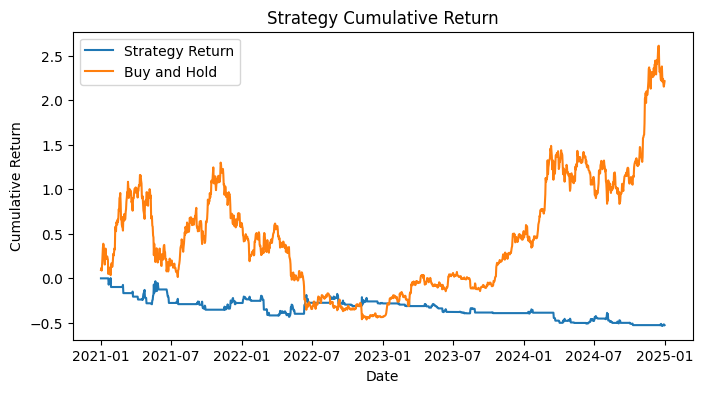

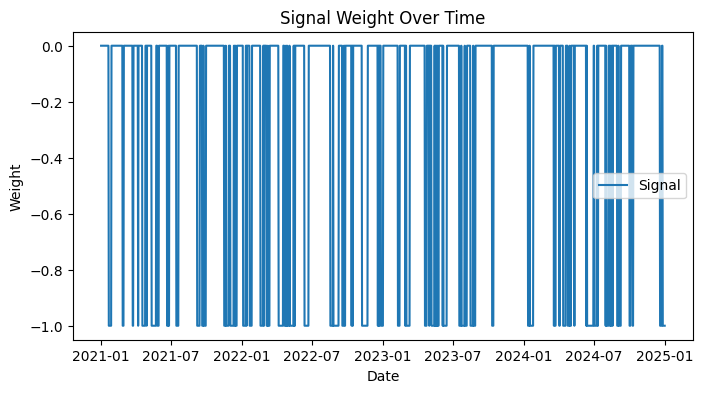

In [94]:
run_backtest(df)

## Long Short

In [131]:
df = full.copy()
df['EMA_5'] = df['Close'].ewm(span=5, adjust=False).mean()
df = df.loc['2021-01-01':'2024-12-31']

rsi_long = df[(df['RSI_14'] > 50)]
macd_long = df[(df['MACD_histogram'] > 0)]
ema_long = df[(df['Close'] > df['EMA_5'])]

long_condition =np.where((D.index.isin(rsi_long.index)) &
                        (D.index.isin(macd_long.index)) &
                        (D.index.isin(ema_long.index)), 1, 0)

rsi_short = df[(df['RSI_14'] < 50)]
macd_short = df[(df['MACD_histogram'] < 0)]
ema_short = df[(df['Close'] < df['EMA_5'])]

short_condition = np.where((D.index.isin(rsi_short.index)) &
                        (D.index.isin(macd_short.index)) &
                        (D.index.isin(ema_short.index)), -1, 0)

condition = long_condition + short_condition
df = pd.DataFrame(condition, index = df.index, columns=['signal'])

Overall Annual Return: 14.92%
Overall Annual Sharpe Ratio: 0.31
Maximum Drawdown: -41.26 %
Win/Loss Ratio: 0.9
Alpha: 0.3391
Beta: -0.0783

Yearly Metrics:
   year  yearly_return  yearly_std  yearly_beta  yearly_alpha  yearly_sharpe
0  2021       0.463840    0.621423    -0.019057      0.587968       0.746416
1  2022      -0.286178    0.509151    -0.390934     -0.539925      -0.562069
2  2023       0.448414    0.326529     0.206349      0.201440       1.373271
3  2024       0.152568    0.419454     0.026045      0.206407       0.363729


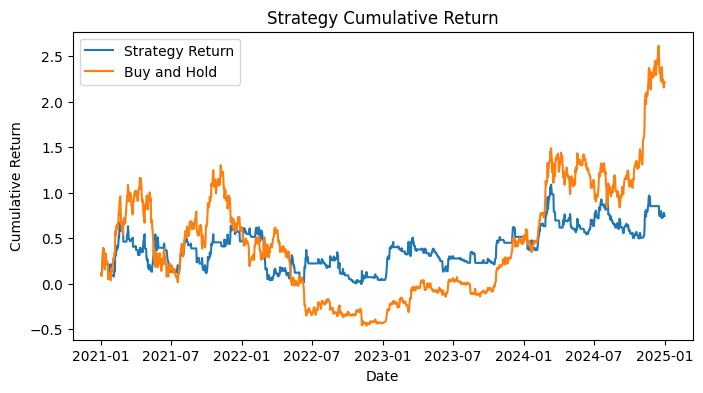

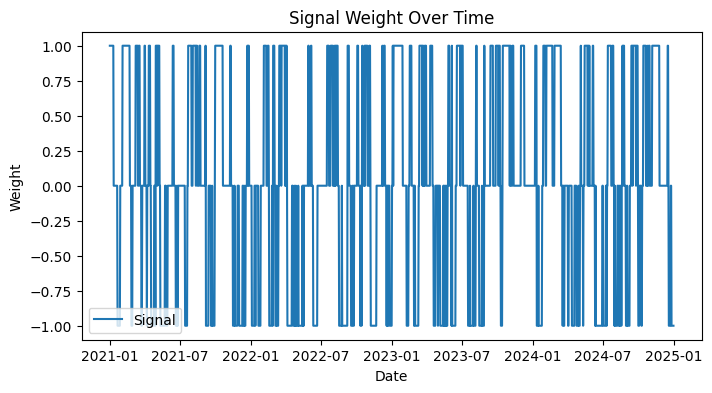

In [132]:
run_backtest(df)

# Testing

In [104]:
df = full.copy()
df['SMA_5'] = df['Close'].rolling(window=5).mean()
df = df.loc['2021-01-01':'2024-12-31']

rsi_long = df[(df['RSI_14'] > 40)]
macd_long = df[(df['MACD_histogram'] > 0)]
sma_long = df[(df['Close'] > df['SMA_50'])]

condition =np.where((D.index.isin(rsi_long.index)) &
                        (D.index.isin(macd_long.index)) &
                        (D.index.isin(sma_long.index)), 1, 0)

df = pd.DataFrame(condition, index = df.index, columns=['signal'])

Overall Annual Return: 29.72%
Overall Annual Sharpe Ratio: 0.8963
Maximum Drawdown: -39.15 %
Win/Loss Ratio: 0.97
Alpha: 0.1924
Beta: 0.2868

Yearly Metrics:
   year  yearly_return  yearly_std  yearly_beta  yearly_alpha  yearly_sharpe
0  2021       0.734749    0.455855     0.320615      0.394011       1.611804
1  2022      -0.310905    0.242603     0.144950     -0.218908      -1.281540
2  2023       0.889472    0.270419     0.374436      0.270428       3.289241
3  2024       0.253853    0.314884     0.346220     -0.036182       0.806180


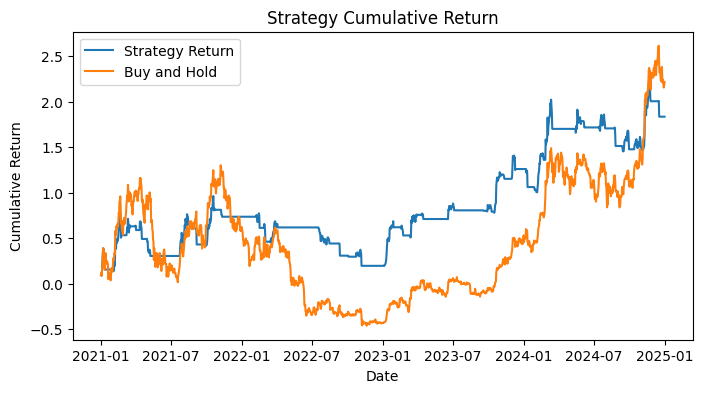

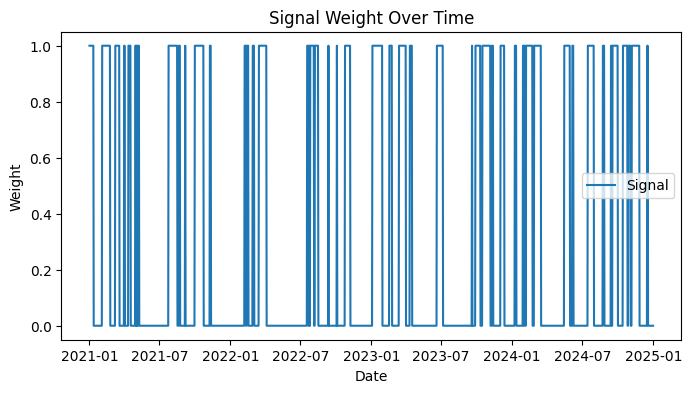

In [105]:
run_backtest(df)